# DNSM: Selection Factor vs Accessible Surface Area

In [1]:
import os, sys
import itertools
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display
from collections import Counter
import pprint

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from dnsmex.dms_viz import *
from dnsmex.local import localify

In [2]:
# settings
ROUND_DIGITS = 4
BUILD_CSV = True
REBUILD_CSV = False

COLORS = {
    'dnsm_sf': '#675ed6',
    'rel_asa': '#808080'
}

In [3]:
prefix = "dnsm_asa"

In [4]:
# input paths
DNSM_MODELS_DIR = localify("DNSM_TRAINED_MODELS_DIR")
DASM_MODELS_DIR = localify("DASM_TRAINED_MODELS_DIR")
MODELS_DIR = DNSM_MODELS_DIR

SABDAB_DIR = localify("SABDAB_DIR")
PDB_DB_DIR = f'{SABDAB_DIR}/pdb-db'
SABDAB_PATH = f'{SABDAB_DIR}/sabdab_summary_for_dnsm.tsv'
MAX_ASA_PATH = f'{SABDAB_DIR}/max_asa.csv'
DMSVIZ_OUTPUT_DIR = f'{SABDAB_DIR}'
DMSVIZ_TEMP_DIR = f'_temp'

FIGURES_DIR = localify("FIGURES_DIR")
FIGURES_OUTPUT_DIR = f'{FIGURES_DIR}/{prefix}'
OUTPUT_DIR = f'{FIGURES_DIR}/{prefix}'
TEMP_DIR = f'_temp'

print(f"{FIGURES_OUTPUT_DIR=}")

FIGURES_OUTPUT_DIR='/home/drich/shared-data/bcr-mut-sel/output/dnsm_asa'


In [5]:
for path in [OUTPUT_DIR, TEMP_DIR, DMSVIZ_OUTPUT_DIR, DMSVIZ_TEMP_DIR]:
    print(f"{path=}")
    os.makedirs(path, exist_ok=True)

path='/home/drich/shared-data/bcr-mut-sel/output/dnsm_asa'
path='_temp'
path='/home/drich/shared-data/bcr-mut-sel/sabdab'
path='_temp'


## Load CSV

In [6]:
DNSM_MODEL_NAME = "dnsm_1m-v1jaffe+v1tang-joint"
pdbs_range = None
# pdbs_range = [0, 50]

In [7]:
if BUILD_CSV:
    util = DmsViz_Utility(
        output_dir=DMSVIZ_OUTPUT_DIR,
        temp_dir=TEMP_DIR,
        sabdab_path=SABDAB_PATH,
        pdb_db_dir=PDB_DB_DIR,
        dnsm_models_dir=DNSM_MODELS_DIR,
        dnsm_model_name=DNSM_MODEL_NAME,
    )
    util.PDB_PARSER_PERMISSIVE = True
    util.PDB_PARSER_QUIET = True
    util.ALWAYS_REBUILD_CSV = REBUILD_CSV
    util.PDBS_RANGE = pdbs_range
    util.update_pdbs_csv_path()
    pdbs_df = util.save_pdbs_table()

pdbs_df already found at: /home/drich/shared-data/bcr-mut-sel/sabdab/pdb-db.dnsm_1m-v1jaffe+v1tang-joint.ALL.csv


/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:225: DtypeWarning: Columns (12,36,41,42,43,44,45,46,47,48,49,62,77,78,79,80,81,82,83,84,85,92,93,94,100,103,104,108,109,111,112,113,114,115,117,118,119,120,121,123,124,125,127,128,129,130,131,132,133,134,138,139,140,141,142,143,144,154,167,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,233) have mixed types. Specify dtype option on import or set low_memory=False.
  self.pdbs_df = pd.read_csv(self.PDB_CSV_PATH)


In [8]:
util = DmsViz_Utility(
    output_dir=DMSVIZ_OUTPUT_DIR,
    temp_dir=TEMP_DIR,
    sabdab_path=SABDAB_PATH,
    pdb_db_dir=PDB_DB_DIR,
    dnsm_models_dir=MODELS_DIR,
    dnsm_model_name=DNSM_MODEL_NAME,
)
util.PDBS_RANGE = pdbs_range
util.update_pdbs_csv_path()
init_pdbs_df = df_remove_index_cols(util.load_pdbs_table())

print(f"{util.PDB_CSV_PATH=}")
display(init_pdbs_df)

/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:225: DtypeWarning: Columns (12,36,41,42,43,44,45,46,47,48,49,62,77,78,79,80,81,82,83,84,85,92,93,94,100,103,104,108,109,111,112,113,114,115,117,118,119,120,121,123,124,125,127,128,129,130,131,132,133,134,138,139,140,141,142,143,144,154,167,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,233) have mixed types. Specify dtype option on import or set low_memory=False.
  self.pdbs_df = pd.read_csv(self.PDB_CSV_PATH)


util.PDB_CSV_PATH='/home/drich/shared-data/bcr-mut-sel/sabdab/pdb-db.dnsm_1m-v1jaffe+v1tang-joint.ALL.csv'


,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,imgt_1,imgt_2,...,imgt_120,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
0,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,dnsm_sf,opig-chothia,0.8253513,0.59364116,...,0.3971957,0.040973853,0.3065939,NaN,1.0289783,0.3222303,0.6314443,0.08236274,0.53974426,0.72325665
1,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,num,opig-chothia,1,2,...,105,106,107,NaN,108,109,110,111,112,113
2,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,rel_asa,opig-chothia,0.9551569506726457,0.26436781609195403,...,0.4577777777777778,0.10576923076923077,0.011627906976744186,NaN,0.38308457711442784,0.0,0.12790697674418605,0.034482758620689655,0.08387096774193549,0.6124031007751938
3,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,wildtype,opig-chothia,E,V,...,Q,G,T,NaN,L,V,T,V,S,A
4,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,dnsm_sf,opig-imgt,0.8253513,0.59364116,...,0.3971957,0.040973853,0.3065939,NaN,1.0289783,0.3222303,0.6314443,0.08236274,0.53974426,0.72325665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230524,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,dnsm_sf,opig-imgt,NaN,0.44905138,...,1.3429549,0.06391238,0.6963682,NaN,0.7727657,0.0800255,0.777167,0.07075209,0.85237163,NaN
230525,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,num,opig-imgt,NaN,2,...,120,121,122,NaN,123,124,125,126,127,NaN
230526,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,rel_asa,opig-imgt,NaN,0.3793103448275862,...,0.7203389830508474,0.22115384615384615,0.12209302325581395,NaN,0.6511627906976745,0.034482758620689655,0.23255813953488372,0.08620689655172414,0.4774193548387097,NaN
230527,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,wildtype,opig-imgt,NaN,V,...,K,G,T,NaN,T,V,T,V,S,NaN


In [9]:
# filter df to only include human_ig and heavy chain
df = util.pdbs_df
df = df[(df.organism == 'human_ig') & (df.chain_type == 'H')]
df = df.reset_index(drop=True)
util.pdbs_df = df
display(util.pdbs_df)

,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,imgt_1,imgt_2,...,imgt_120,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
0,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,dnsm_sf,opig-chothia,0.7742865,0.3843502,...,0.95167136,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267
1,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,num,opig-chothia,1,2,...,105,106,107,NaN,108,109,110,111,112,113
2,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,rel_asa,opig-chothia,0.8161434977578476,0.15517241379310345,...,0.7644444444444445,0.23076923076923078,0.10465116279069768,NaN,0.23880597014925373,0.0,0.13372093023255813,0.05747126436781609,0.1935483870967742,0.567741935483871
3,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,wildtype,opig-chothia,E,V,...,Q,G,T,NaN,L,V,T,V,S,S
4,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,0.7742865,0.3843502,...,0.95167136,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76408,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,dnsm_sf,opig-imgt,NaN,0.44905138,...,1.3429549,0.06391238,0.6963682,NaN,0.7727657,0.0800255,0.777167,0.07075209,0.85237163,NaN
76409,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,num,opig-imgt,NaN,2,...,120,121,122,NaN,123,124,125,126,127,NaN
76410,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,rel_asa,opig-imgt,NaN,0.3793103448275862,...,0.7203389830508474,0.22115384615384615,0.12209302325581395,NaN,0.6511627906976745,0.034482758620689655,0.23255813953488372,0.08620689655172414,0.4774193548387097,NaN
76411,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,wildtype,opig-imgt,NaN,V,...,K,G,T,NaN,T,V,T,V,S,NaN


In [10]:
# exampine pdbid 5i19
df_ = util.pdbs_df
df_ = df_[df_['pdbid'] == '5i19']
df_ = df_[df_['stat'].isin(['dnsm_sf','rel_asa'])]
display(df_)

,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,imgt_1,imgt_2,...,imgt_120,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
17400,human_ig,5i19,5i19HL,IGHV3,IGHJ1,H,dnsm_sf,opig-chothia,0.2929977,0.39471042,...,0.6650742,0.015460248,0.6779861,NaN,0.5429408,0.2223875,0.41302067,0.08495031,0.22547933,0.89401764
17402,human_ig,5i19,5i19HL,IGHV3,IGHJ1,H,rel_asa,opig-chothia,0.5067264573991032,0.3793103448275862,...,0.7822222222222223,0.19230769230769232,0.13372093023255813,NaN,0.1691542288557214,0.0,0.06395348837209303,0.05172413793103448,0.2,0.5935483870967742
17404,human_ig,5i19,5i19HL,IGHV3,IGHJ1,H,dnsm_sf,opig-imgt,0.2929977,0.39471042,...,0.6650742,0.015460248,0.6779861,NaN,0.5429408,0.2223875,0.41302067,0.08495031,0.22547933,0.89401764
17406,human_ig,5i19,5i19HL,IGHV3,IGHJ1,H,rel_asa,opig-imgt,0.5067264573991032,0.3793103448275862,...,0.7822222222222223,0.19230769230769232,0.13372093023255813,NaN,0.1691542288557214,0.0,0.06395348837209303,0.05172413793103448,0.2,0.5935483870967742
17408,human_ig,5i19,5i19HL,IGHV3,IGHJ1,H,dnsm_sf,rcsb,0.2929977,0.39471042,...,0.6650742,0.015460248,0.6779861,NaN,0.5429408,0.2223875,0.41302067,0.08495031,0.22547933,0.89401764
17410,human_ig,5i19,5i19HL,IGHV3,IGHJ1,H,rel_asa,rcsb,0.5067264573991032,0.3793103448275862,...,0.7822222222222223,0.19230769230769232,0.13372093023255813,NaN,0.1691542288557214,0.0,0.06395348837209303,0.05172413793103448,0.2,0.5935483870967742


In [11]:
# compare sequences from different sources and whether they match.
abids = list(set(util.pdbs_df.abid))
print(f"abids: {len(abids)}")
abids_match = {False: [], True: []}

# first_n_rows = len(abids)
first_n_rows = 2500

df = util.pdbs_df
df["source_stat"] = [f"{x}::{y}" for x,y in zip(df["source"],df["stat"])]
compare_df = pd.DataFrame({})
for i,abid in enumerate(abids):
    row_data = df[(df.abid == abid) & (df.stat.str.endswith("wildtype"))][["source_stat"] + util.get_imgt_cols()]
    data = {}
    for j,(_,row) in enumerate(row_data.iterrows()):
        data[row.source_stat] = ''.join(list(row[util.get_imgt_cols()].dropna()))
    compare_row = {}
    seqs_match = True
    for a,b in itertools.product(data.keys(), data.keys()):
        if (a < b):
            compare_row[(a,b)] = (data[a] == data[b])
            seqs_match &= (data[a] == data[b])
    abids_match[seqs_match].append(abid)

    compare_df = pd.concat([compare_df, pd.DataFrame([compare_row])])
    if i % 1000 == 0:
        print(f'n_row: {i} of {first_n_rows}')
    if i >= first_n_rows:
        break

display(compare_df.value_counts())
print(f'abids_match: {abids_match}')

abids: 6368
n_row: 0 of 2500
n_row: 1000 of 2500
n_row: 2000 of 2500


(opig-chothia::wildtype, opig-imgt::wildtype)  (opig-chothia::wildtype, rcsb::wildtype)  (opig-imgt::wildtype, rcsb::wildtype)
True                                           True                                      True                                     2261
                                               False                                     False                                     212
False                                          False                                     True                                       15
                                               True                                      False                                      13
Name: count, dtype: int64

abids_match: {False: ['7z2mBA', '4r4nNO', '7daaHL', '6u0nPQ', '3mugDC', '8tfqHL', '6xjqHL', '6h06EF', '5i8hGH', '8ojtHL', '6udkMN', '7su0IM', '7n3gHL', '5t3sDE', '7lyvCD', '6vy2IM', '7m6fCD', '4xgzAB', '7uarFG', '4xgzUV', '7n05HL', '6mu3HL', '6wh9BC', '4y5yAB', '1rzgCD', '4dgyHL', '7sd3GH', '5jr1HL', '7aj6HL', '7qf1CB', '6ca7HL', '6nb8HL', '6v4qHL', '6wasHL', '4irzHL', '7shzCD', '7e9bHL', '5utzBC', '6blhHL', '1aqkHL', '4xgzWX', '8t2aAB', '4xgzOP', '6wh9EF', '8ojvHL', '5k59EF', '3mugBA', '6uydHL', '6dw2BA', '6j9oHL', '7arnHL', '7sjmHL', '7mmoAB', '2qadHG', '5ur8AB', '3q6fJI', '5kjrHL', '6bkbHL', '6h0eEF', '4yaqAB', '6be2HL', '5y11AB', '4r4nTU', '5te6HL', '6wfyHL', '6bhzIM', '8ffeHL', '8cwiHL', '4ydiHL', '7bz5HL', '4r4nCD', '6vy2JN', '4xh2EF', '7uarDE', '7nivED', '8r61MN', '5gmqBC', '6blaHL', '5bvpHL', '5n2kJI', '5nyxMN', '7rpuAB', '7kraIJ', '5tfsHL', '6oz4HL', '5k59HL', '4xbeHL', '6al4FE', '6tcrHL', '7x08JN', '4jm4HL', '6oz2HL', '5tdpBA', '6yorHL', '5bjzDH', '6h06CD', '3csyCD', '5f89HL'

In [12]:
# select data source
all_data_sources = ["rcsb", "opig-imgt", "opig-chothia"]
source_dict = {
  "num": "opig-imgt",
  "wildtype": "opig-imgt",
  "rel_asa": "opig-imgt",
  "dnsm_sf": "opig-imgt"
}
selected_stats = [f"{value}::{key}" for key,value in source_dict.items()]

df = util.pdbs_df
df["source_stat"] = [f"{x}::{y}" for x,y in zip(df["source"],df["stat"])]
df = df[df.source_stat.isin(tuple(selected_stats))]
df = df.dropna(how='all', axis='columns')

util.pdbs_df = df
pdbs_df = util.pdbs_df
display(pdbs_df)

,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,imgt_1,imgt_2,...,imgt_120,imgt_121,imgt_122,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128,source_stat
4,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,0.7742865,0.3843502,...,0.95167136,0.022909729,1.0580907,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267,opig-imgt::dnsm_sf
5,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,num,opig-imgt,1,2,...,120,121,122,123,124,125,126,127,128,opig-imgt::num
6,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,rel_asa,opig-imgt,0.8161434977578476,0.15517241379310345,...,0.7644444444444445,0.23076923076923078,0.10465116279069768,0.23880597014925373,0.0,0.13372093023255813,0.05747126436781609,0.1935483870967742,0.567741935483871,opig-imgt::rel_asa
7,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,wildtype,opig-imgt,E,V,...,Q,G,T,L,V,T,V,S,S,opig-imgt::wildtype
16,human_ig,1ad0,1ad0DC,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,0.7742865,0.3843502,...,0.95167136,0.022909729,1.0580907,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267,opig-imgt::dnsm_sf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76399,human_ig,8ttw,8ttwKL,IGHV4,unknown,H,wildtype,opig-imgt,Q,I,...,Q,G,T,L,I,S,V,S,A,opig-imgt::wildtype
76408,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,dnsm_sf,opig-imgt,NaN,0.44905138,...,1.3429549,0.06391238,0.6963682,0.7727657,0.0800255,0.777167,0.07075209,0.85237163,NaN,opig-imgt::dnsm_sf
76409,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,num,opig-imgt,NaN,2,...,120,121,122,123,124,125,126,127,NaN,opig-imgt::num
76410,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,rel_asa,opig-imgt,NaN,0.3793103448275862,...,0.7203389830508474,0.22115384615384615,0.12209302325581395,0.6511627906976745,0.034482758620689655,0.23255813953488372,0.08620689655172414,0.4774193548387097,NaN,opig-imgt::rel_asa


In [13]:
# ensure that only using abids with both asa and dnsm data.
df = util.pdbs_df
abids_from_dnsm = set(df[df.stat == 'dnsm_sf'].abid)
abids_from_asa = set(df[df.stat == 'rel_asa'].abid)
abids_from_both = (abids_from_dnsm & abids_from_asa)
df = df[df.abid.isin(abids_from_both)]
util.pdbs_df = df

print(f"abids_from_dnsm: {len(abids_from_dnsm)}")
print(f"abids_from_asa: {len(abids_from_asa)}")
print(f"abids_from_both: {len(abids_from_both)}")

abids_from_dnsm: 6368
abids_from_asa: 6368
abids_from_both: 6368


In [14]:
# Remove pdbs where IMGT 1 is missing
df = pdbs_df[pdbs_df.stat == 'dnsm_sf']
imgt_mask = ~df['imgt_1'].isna()

# Counts for missing IMGT 1, IMGT 2, and IMGT 3
for imgt_col in ['imgt_1', 'imgt_2', 'imgt_3']:
    imgt_mask_i = ~df[imgt_col].isna()
    imgt_mask |= imgt_mask_i
    print(f'{imgt_col}: {imgt_mask_i.sum()} {(~imgt_mask_i).sum()} | {imgt_mask.sum()} {(~imgt_mask).sum()}')

imgt_1: 4882 1486 | 4882 1486
imgt_2: 6109 259 | 6127 241
imgt_3: 6296 72 | 6303 65


In [15]:
# check for suffix skips
imgt_cols = util.get_imgt_cols()
uncommon_imgt_cols = DmsViz_Utility.get_uncommon_imgt_cols(imgt_cols)
no_skips = True
for i in range(1,len(uncommon_imgt_cols)):
    if uncommon_imgt_cols[i][0:-1] == uncommon_imgt_cols[i-1][0:-1]:
        if not abs(ord(uncommon_imgt_cols[i][-1]) - ord(uncommon_imgt_cols[i-1][-1])) == 1:
            no_skips = False
            print(f'skip at: {uncommon_imgt_cols[i-1]} {uncommon_imgt_cols[i]}')
if no_skips:
    print('no skips found.')

no skips found.


In [16]:
# check for XYZ suffixes in sites
x_imgt_cols = [x for x in imgt_cols if x[-1] in 'XYZ']
x_imgt_mask = pd.Series(False, index=pdbs_df.index)
for x_imgt_col in x_imgt_cols:
    new_x_imgt_mask = ~pdbs_df[x_imgt_col].isna()
    x_imgt_mask = x_imgt_mask | new_x_imgt_mask
x_pdbs_df = pdbs_df[x_imgt_mask]
display(x_pdbs_df[x_imgt_cols])
# display(x_pdbs_df)

,imgt_111X,imgt_112Y,imgt_112X
32056,0.711537,0.36656296,0.828893
32057,111X,112Y,112X
32058,0.011976047904191617,0.2694300518134715,0.0
32059,C,D,C


In [17]:
pdbs_table = DmsViz_Table(pdbs_df)
split_dfs = pdbs_table.split_by_stat(include_headers=True)
seq_df = split_dfs["wildtype"]
stat_df = pdbs_table.build_stat_df(metrics=['rel_asa', 'dnsm_sf'])
display_all(stat_df)

/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:683: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seq_df[self.imgt_cols] = seq_df[self.imgt_cols].astype(str).replace('nan', pd.NA)
/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:683: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seq_df[self.imgt_cols] = seq_df[self.imgt_cols].astype(str).replace('nan', pd.NA)


,imgt,imgt_num,imgt_label,imgt_occurrences,cdr_region,is_cdr_region,aa_mode,aa_mode_count,aa_mode_perc,dnsm_sf_median,dnsm_sf_mean,dnsm_sf_quantiles,rel_asa_median,rel_asa_mean,rel_asa_quantiles
0,imgt_1,1,1,4882,None,False,Q,2489,0.509832,0.3758,0.5619,"(0.0589, 0.2141, 0.3758, 0.6745, 2.5059)",0.8430,0.8178,"(0.1556, 0.7644, 0.843, 0.9067, 1.0)"
1,imgt_2,2,2,6109,None,False,V,5577,0.912915,0.5178,0.6060,"(0.1586, 0.3773, 0.5178, 0.7714, 2.3177)",0.2356,0.2834,"(0.0, 0.1609, 0.2356, 0.3812, 1.0)"
2,imgt_3,3,3,6296,None,False,Q,5725,0.909307,0.5495,0.5604,"(0.0615, 0.4638, 0.5495, 0.6474, 2.3878)",0.4711,0.4670,"(0.0356, 0.4089, 0.4711, 0.5333, 1.0)"
3,imgt_4,4,4,6335,None,False,L,6266,0.989108,0.2006,0.3291,"(0.0423, 0.15, 0.2006, 0.4177, 1.6893)",0.0448,0.0512,"(0.0, 0.0299, 0.0448, 0.0597, 1.0)"
4,imgt_4A,4,4A,18,None,False,L,18,1.000000,0.7764,0.7576,"(0.607, 0.7764, 0.7764, 0.7764, 0.7764)",0.3781,0.3483,"(0.0398, 0.3657, 0.3781, 0.3818, 0.4776)"
5,imgt_5,5,5,6337,None,False,V,4644,0.732839,0.5419,0.5559,"(0.1121, 0.435, 0.5419, 0.6642, 1.379)",0.4138,0.4149,"(0.0297, 0.3632, 0.4138, 0.4655, 0.7712)"
6,imgt_6,6,6,6338,None,False,E,3807,0.600663,0.2323,0.2484,"(0.0139, 0.1195, 0.2323, 0.3196, 1.1847)",0.0578,0.0685,"(0.0, 0.04, 0.0578, 0.0852, 0.852)"
7,imgt_7,7,7,6335,None,False,S,6162,0.972691,0.1407,0.1932,"(0.0297, 0.0961, 0.1407, 0.1809, 1.2624)",0.3677,0.3339,"(0.0581, 0.2194, 0.3677, 0.4129, 0.7484)"
8,imgt_8,8,8,6343,None,False,G,6305,0.994009,0.1250,0.2374,"(0.0151, 0.0513, 0.125, 0.4025, 2.119)",0.3942,0.4093,"(0.0481, 0.3462, 0.3942, 0.4904, 0.8462)"
9,imgt_9,9,9,6342,None,False,G,3000,0.473037,0.1042,0.3052,"(0.0112, 0.0281, 0.1042, 0.5823, 1.8882)",0.3585,0.4005,"(0.0192, 0.2788, 0.3585, 0.5504, 0.8915)"


## Inspect PDBs

In [18]:
hchain_df = pdbs_df[pdbs_df.chain_type == 'H']
lchain_df = pdbs_df[pdbs_df.chain_type == 'L']

inspect_ids = set(seq_df[(seq_df['imgt_116'] == 'D')].pdbid)
h_inspect_df = hchain_df[hchain_df['pdbid'].isin(inspect_ids)]
l_inspect_df = lchain_df[lchain_df['pdbid'].isin(inspect_ids)]

print(len(inspect_ids))
# print(inspect_ids)
for id, pbid in enumerate(inspect_ids):
  print(f'{pbid} ', end='')
  if id % 10 == 9:
    print()
    print(f'{id} ', end='')

2569
7sg5 5n0a 7lk9 5otj 7kf9 8d8r 6az2 7x93 3w9e 7q0h 
9 6txz 6be2 5nyx 5jw4 7yr0 7chs 3tnn 1zlv 5uwe 6me1 
19 6dfj 5bk5 7wvg 6c5v 8dtx 6wor 1iqd 3drq 7cwu 8oju 
29 6vtu 7y3n 8t7f 7rxj 8byu 3hmx 8gbv 5tzu 7ws6 7c01 
39 4hk0 8dfi 4nwu 7bek 2ybr 6xp6 7czx 8a1e 3na9 6uum 
49 1fve 6uuh 4i77 6n7j 3h42 8df5 8bbo 7s4g 3qhf 6al5 
59 7lsf 3eyf 4xnm 6nmv 6n8d 5fhc 8ahn 7wcu 3bn9 5f45 
69 4ydj 6t3j 5bzd 7jkm 3sm5 1n0x 5trp 1u8m 4gsd 6e1k 
79 2eks 3tyg 5u3j 6k0y 6udk 6oge 8ol9 5zmj 7mmn 7czr 
89 7n0a 6fy3 6mtt 7ul1 1wt5 6okp 2aj3 7ek0 7t4r 7uvq 
99 6pze 6fg1 7jxc 7l06 1u8o 5vzx 7whd 7ufq 8jhc 5ugy 
109 6wps 7czq 7t8w 8da1 3mme 4xml 6p9h 4r8w 5wcd 6db7 
119 4fqq 6xxv 7u8e 7kzc 4g80 5iie 7mlz 7kn7 7wn8 7tpg 
129 7xmx 6wg8 3u6r 7vzt 8i5h 8tp5 6dkj 3giz 7ye9 7cak 
139 5fhb 4dgy 2fjf 5t3z 7su0 5cba 8tp4 3moa 4ocs 7f7h 
149 6wxl 5wcc 7nd3 5i1k 7s7i 7unb 7lxn 6bft 7s08 2hff 
159 7km6 7xj8 8g4t 6vo3 7rdj 7sjm 8gsb 7si2 4nzt 7ps6 
169 2f5b 7cgw 6oz2 6mef 7lf2 7c2l 5ubz 7u9g 6emj 6mlm 
179 3u2s 4uv7 1rzi 7

## Lineplots

In [19]:
def build_lineplot_via_altair(
    pdbs_df=pdbs_df,
    abids=None,
    name=None,
    use_numeric_labels=True,
    metrics=['dnsm_sf','rel_asa'],
    colors=COLORS,
    metric_names=['DNSM Selection Factor','Solvent Accessibility'],
    output_path=None,
):
    data_df = pdbs_df.copy()

    if name is None:
        name = 'all_abids'
        if abids is not None and len(abids) == 1:
            name = abids[0]

    imgt_x = 'imgt_label:N'
    if use_numeric_labels:
        imgt_x = 'imgt_num:Q'

    imgt_cols = [x for x in data_df.columns if x.startswith('imgt_')]
    df = pd.DataFrame({
      'tooltip': 0.0,
      'wildtype': list(data_df[data_df.stat == 'wildtype'][imgt_cols].mode(dropna=True).iloc[0]),
      'imgt_num': list(int(float(x.replace('imgt_','').rstrip('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))) for x in imgt_cols),
      'imgt_label': imgt_cols,
      'imgt_occurrences': stat_df['imgt_occurrences'],
    })
    for metric in metrics:
        df[metric] = list(data_df[data_df.stat == metric][imgt_cols].astype(float).median(skipna=True).round(ROUND_DIGITS))
    df['is_gap'] = df.wildtype.isna()

    if abids is not None:
      data_df = data_df[data_df.abid.isin(abids)].dropna(axis=1, how='all')
    df = df[df.imgt_num <= DmsViz_Utility.MAX_NUM_SCHEME]
    imgt_cols = list(df.imgt_label)

    line_size = 2.5
    tooltip = ['imgt_label', 'imgt_num', 'wildtype', 'imgt_occurrences'] + metrics

    df['stat'] = '-'
    titles = { 'tooltip': '', }
    dfs = { 'tooltip': df, }
    # colors['tooltip'] = '#000000'
    for metric,metric_name in zip(metrics,metric_names):
        df_copy = df.copy()
        df_copy['stat'] = metric_name
        dfs[metric] = df_copy
        titles[metric] = metric_name

    lines = {}
    for key,title in titles.items():
        lines[key] = alt.Chart(dfs[key]).mark_line(point=True).encode(
            x=alt.X(imgt_x, sort=imgt_cols, scale=alt.Scale(domain=imgt_cols), title='IMGT Numbering'),
            y=alt.Y(f'{key}:Q', title=title),
            size=alt.value(line_size),
            color=alt.Color('stat:N',
                            scale=alt.Scale(domain=list(titles.values()), range=list(colors.values())),
                            legend=alt.Legend(
                                title='Legend',
                                orient='bottom',
                                labelFontSize=16,
                                symbolType='square',
                                symbolFillColor='auto',
                            )),
            strokeDash=alt.condition(
                alt.datum.is_gap,
                alt.value([5, 5]),  # Dotted line
                alt.value([0])      # Solid line
            )
        ).interactive()

    # tool tips that only reference the x-axis
    lines['tooltip'] = lines['tooltip'].encode(opacity=alt.value(0))
    nearest = alt.selection_point(nearest=True, on='mouseover', fields=['x'], empty=True)
    points0 = lines['tooltip'].mark_point().encode(
        tooltip=tooltip,
        size=alt.value(0),
        opacity=alt.value(0)
    ).add_params(
        nearest
    )

    # column shaders
    shader_df = pd.DataFrame({
        'shaded_imgt_cols': df['imgt_label'].iloc[::2]
    })
    shading = alt.Chart(shader_df).mark_rect(opacity=0.2, color='lightblue').encode(
        x=alt.X('shaded_imgt_cols:N', sort=imgt_cols, scale=alt.Scale(domain=imgt_cols))
    )

    # join charts
    metric_lines = [lines[key] for key in lines if key != 'tooltip']
    chart = alt.layer(shading, *metric_lines, points0 + lines['tooltip']).properties(
        width=(len(imgt_cols) * 20),
        height=400,
        title=f'Selection Factors vs Solvent Accessibility: {name}'
    )

    if output_path is not None:
        print(f'figure saved to: {output_path}')
        chart.save(output_path, format='html')
    return chart

In [20]:
metrics = {
    'dnsm_sf': 'DNSM Selection Factor',
    'rel_asa': 'Solvent Accessibility',
}
colors = COLORS.copy()

abids = list(set(pdbs_df.abid))
chart = build_lineplot_via_altair(
    abids=abids,
    pdbs_df=pdbs_df,
    use_numeric_labels=False,
    metrics=list(metrics.keys()),
    metric_names=list(metrics.values()),
    colors=colors,
    output_path=f"{FIGURES_OUTPUT_DIR}/dnsm.lineplot.html",
)
chart.show()

figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_asa/dnsm.lineplot.html


alt.LayerChart(...)

## Boxplots

In [21]:
def build_boxplot_via_altair(
    pdbs_df=pdbs_df,
    abids=None,
    name=None,
    metrics=['dnsm_sf','rel_asa'],
    metric_names=['DNSM Selection Factors', 'Solvent Accessibility'],
    colors=COLORS,
    output_path=None,
):
    data_df = pdbs_df.dropna(axis=1, how='all')
    if abids is not None:
      data_df = data_df[data_df.abid.isin(abids)].dropna(axis=1, how='all')

    if name is None:
        name = 'all_abids'
        if abids is not None and len(abids) == 1:
            name = abids[0]

    imgt_cols = [x for x in data_df.columns if x.startswith('imgt_')]

    seq_df = data_df[data_df.stat == 'wildtype']
    val_df = data_df[data_df.stat.isin(metrics)]
    val_df[imgt_cols] = val_df[imgt_cols].astype(float)

    df = pd.melt(val_df, id_vars=['stat'], value_vars=imgt_cols, var_name='imgt_col', value_name='value').reset_index()
    df['imgt_num'] = [int(float(x.replace('imgt_','').rstrip('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))) for x in df.imgt_col]
    df = df[~df.value.isna()]
    df = df[df.imgt_num <= DmsViz_Utility.MAX_NUM_SCHEME]
    imgt_cols = [x for x in imgt_cols if int(float(x.replace('imgt_','').rstrip('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))) <= DmsViz_Utility.MAX_NUM_SCHEME]

    # aggregate quantiles for each dnsm and asa
    def build_boxplot_stats(in_df):
        boxplot_stats = in_df.copy().groupby('imgt_col')['value'].describe(percentiles=[0.0, .25, .5, .75, 1.0]).reset_index()
        boxplot_stats = boxplot_stats.rename(columns={'0%':'Q0', '25%':'Q1', '50%':'Q2', '75%':'Q3', '100%':'Q4'})
        for stat in ['min','Q0','Q1','Q2','Q3','Q4','max']:
            boxplot_stats[stat] = boxplot_stats[stat].round(ROUND_DIGITS)
        boxplot_stats['IQR'] = boxplot_stats['Q3'] - boxplot_stats['Q1']
        boxplot_stats['lower_bound'] = boxplot_stats['Q1'] - 1.5 * boxplot_stats['IQR']
        boxplot_stats['upper_bound'] = boxplot_stats['Q3'] + 1.5 * boxplot_stats['IQR']
        boxplot_stats['lower_whisker'] = boxplot_stats.apply(lambda row: max(row['min'], row['lower_bound']), axis=1).round(ROUND_DIGITS)
        boxplot_stats['upper_whisker'] = boxplot_stats.apply(lambda row: min(row['max'], row['upper_bound']), axis=1).round(ROUND_DIGITS)
        boxplot_stats['quantiles'] = boxplot_stats.apply(lambda row: tuple([row['lower_whisker'], row['Q1'], row['Q2'], row['Q3'], row['upper_whisker']]), axis=1)
        boxplot_stats['imgt_occurrences'] = stat_df['imgt_occurrences']

        outliers = in_df[(in_df['value'] < boxplot_stats['lower_bound'].min()) |
                        (in_df['value'] > boxplot_stats['upper_bound'].max())]
        return boxplot_stats, outliers

    metric_dfs = {}
    metric_boxstats = {}
    metric_outliers = {}
    for metric in metrics:
        metric_df = df[df.stat == metric]
        boxstats,outliers = build_boxplot_stats(metric_df)
        boxstats['stat'] = metric
        boxstats = boxstats.add_prefix(f'{metric}_')
        boxstats = boxstats.rename(columns={f'{metric}_imgt_col':'imgt_col', f'{metric}_stat':'stat'})
        boxstats = boxstats.drop(columns=['stat'])
        metric_dfs[metric] = metric_df
        metric_boxstats[metric] = boxstats
        metric_outliers[metric] = outliers

    all_boxstats = pd.merge(*list(metric_boxstats.values()), on=['imgt_col'], how='outer')
    for metric in metrics:
        metric_boxstats[metric] = all_boxstats.copy()
        metric_boxstats[metric]['stat'] = metric
    boxstats = pd.concat(list(metric_boxstats.values()), axis=0).reset_index()
    boxstats['imgt_x_stat'] = [f'{row.imgt_col}_x_{row.stat}' for i,row in boxstats.iterrows()]
    imgt_x_stat_cols = [f'{s}_x_{suffix}' for s in imgt_cols for suffix in metrics]
    boxstats['tooltip'] = 0.0

    titles = { x:y for x,y in zip(metrics,metric_names) }
    dfs = metric_boxstats
    offset_pad = 5
    offsets = { x:y for x,y in zip(metrics, np.linspace(-offset_pad,offset_pad,len(metrics))) }

    boxplot_plots = {}
    for metric in metrics:
        x_imgt_col = alt.X('imgt_col:N', sort=imgt_cols, scale=alt.Scale(domain=imgt_cols))
        # build boxplot piece-by-piece
        box = alt.Chart(dfs[metric]).mark_bar().encode(
            x=x_imgt_col,
            y = alt.Y(f'{metric}_Q1:Q', title=titles[metric]),
            y2 = f'{metric}_Q3:Q',
            color=alt.Color('stat:N', legend=alt.Legend(title='Legend', orient='bottom', labelFontSize=12)),
            opacity=alt.value(0.75),
            size=alt.value(7),
            xOffset=alt.value(offsets[metric])
        )
        median = alt.Chart(dfs[metric]).mark_point().encode(
            x=x_imgt_col,
            y=f'{metric}_Q2:Q',
            color=alt.Color('stat:N', legend=alt.Legend(title='Legend', orient='bottom', labelFontSize=12)),
            fill=alt.value('white'),
            strokeWidth=alt.value(2),
            xOffset=alt.value(offsets[metric])
        )
        whiskers = alt.Chart(dfs[metric]).mark_rule().encode(
            x=x_imgt_col,
            y=f'{metric}_lower_whisker:Q',
            y2=f'{metric}_upper_whisker:Q',
            color=alt.Color('stat:N', legend=alt.Legend(title='Legend', orient='bottom', labelFontSize=12)),
            xOffset=alt.value(offsets[metric])
        )
        boxplot_plots[metric] = whiskers + box + median

    display(boxstats)

    # tool tips that only reference the x-axis
    boxstats['imgt_occurrences'] = boxstats['dnsm_sf_count']
    boxstats['dnsm_sf_median'] = boxstats['dnsm_sf_Q2']
    boxstats['rel_asa_median'] = boxstats['rel_asa_Q2']

    stats = ['median', 'mean', 'std']
    for metric in metrics:
        for stat in stats:
            key = f'{metric}_{stat}'
            boxstats[key] = boxstats[key].round(ROUND_DIGITS)

    tooltip = ['imgt_col', 'imgt_occurrences'] + [f'{metric}_{stat}' for metric in metrics for stat in stats]
    tooltip_lines = alt.Chart(boxstats).mark_line().encode(
            x=x_imgt_col,
            y=alt.Y('tooltip:Q'),
            opacity=alt.value(0)
        ).interactive()
    nearest = alt.selection_point(nearest=True, on='mouseover', fields=['x'], empty=True)
    tooltip_points = tooltip_lines.mark_point().encode(
        tooltip=tooltip,
        size=alt.value(0),
        opacity=alt.value(0)
    ).add_params(
        nearest
    )
    tooltip_plot = tooltip_lines + tooltip_points

    # column shaders
    shader_df = pd.DataFrame({
        'shaded_imgt_cols': imgt_cols[::2]
    })
    shading = alt.Chart(shader_df).mark_rect(opacity=0.2, color='lightblue').encode(
        x=alt.X('shaded_imgt_cols:N', sort=imgt_cols, scale=alt.Scale(domain=imgt_cols), axis=alt.Axis(title=None))
    )

    boxplot = alt.layer(shading, boxplot_plots['dnsm_sf'], boxplot_plots['rel_asa'], tooltip_plot).properties(
        title=f'DNSM Selection Factors vs Accessible Solvency: {name}',
        width=(len(imgt_cols) * 30),
        height=400,
    ).interactive()

    if output_path is not None:
        print(f'figure saved to: {output_path}')
        boxplot.save(output_path, format='html')
    return boxplot

In [22]:
metrics = {
    'dnsm_sf': 'DNSM Selection Factor',
    'rel_asa': 'Solvent Accessibility',
}
colors = COLORS.copy()
# color_palette = DmsViz_Utility.get_color_palette(len(metrics))
# colors = {x:y for x,y in zip(metrics.keys(),color_palette)}

chart = build_boxplot_via_altair(
    name='all_abids',
    pdbs_df=pdbs_df,
    metrics=list(metrics.keys()),
    metric_names=list(metrics.values()),
    colors=COLORS,
    output_path=f"{FIGURES_OUTPUT_DIR}/dnsm-asa.boxplot.html",
)
chart.show()

/tmp/ipykernel_2506742/4120815286.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[imgt_cols] = val_df[imgt_cols].astype(float)


,index,imgt_col,dnsm_sf_count,dnsm_sf_mean,dnsm_sf_std,dnsm_sf_min,dnsm_sf_Q0,dnsm_sf_Q1,dnsm_sf_Q2,dnsm_sf_Q3,...,rel_asa_IQR,rel_asa_lower_bound,rel_asa_upper_bound,rel_asa_lower_whisker,rel_asa_upper_whisker,rel_asa_quantiles,rel_asa_imgt_occurrences,stat,imgt_x_stat,tooltip
0,0,imgt_1,4882.0,0.561888,0.532648,0.0589,0.0589,0.2141,0.3758,0.6745,...,0.1423,0.55095,1.12015,0.5510,1.0000,"(0.551, 0.7644, 0.843, 0.9067, 1.0)",4882,dnsm_sf,imgt_1_x_dnsm_sf,0.0
1,1,imgt_10,2.0,0.476457,0.226835,0.3161,0.3161,0.3963,0.4765,0.5567,...,0.0087,0.30075,0.33555,0.3094,0.3269,"(0.3094, 0.3138, 0.3182, 0.3225, 0.3269)",6109,dnsm_sf,imgt_10_x_dnsm_sf,0.0
2,2,imgt_100,6367.0,0.318420,0.146681,0.0999,0.0999,0.2404,0.2867,0.3499,...,0.0232,-0.02700,0.06580,0.0000,0.0658,"(0.0, 0.0078, 0.0155, 0.031, 0.0658)",6296,dnsm_sf,imgt_100_x_dnsm_sf,0.0
3,3,imgt_101,6363.0,0.954156,0.264135,0.0250,0.0250,0.8262,1.0019,1.1356,...,0.0437,0.12635,0.30115,0.1263,0.3012,"(0.1263, 0.1919, 0.2184, 0.2356, 0.3012)",6335,dnsm_sf,imgt_101_x_dnsm_sf,0.0
4,4,imgt_102,6367.0,0.074159,0.093941,0.0115,0.0115,0.0334,0.0464,0.0703,...,0.0076,-0.01140,0.01900,0.0000,0.0190,"(0.0, 0.0, 0.0, 0.0076, 0.019)",18,dnsm_sf,imgt_102_x_dnsm_sf,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,221,imgt_95,6346.0,0.954365,0.331341,0.0625,0.0625,0.7241,0.9758,1.1609,...,0.0805,0.25135,0.57335,0.2513,0.5734,"(0.2513, 0.3721, 0.4124, 0.4526, 0.5734)",6346,rel_asa,imgt_95_x_rel_asa,0.0
448,222,imgt_96,6342.0,1.040641,0.376274,0.0283,0.0283,0.7922,1.0217,1.3385,...,0.1129,0.27585,0.72745,0.2758,0.7275,"(0.2758, 0.4452, 0.5, 0.5581, 0.7275)",6331,rel_asa,imgt_96_x_rel_asa,0.0
449,223,imgt_97,6353.0,0.834028,0.416188,0.0702,0.0702,0.4754,0.8484,1.0361,...,0.1032,0.34300,0.75580,0.3430,0.7558,"(0.343, 0.4978, 0.5561, 0.601, 0.7558)",6271,rel_asa,imgt_97_x_rel_asa,0.0
450,224,imgt_98,6361.0,0.151458,0.140240,0.0156,0.0156,0.0537,0.0997,0.2020,...,0.0155,-0.01805,0.04395,0.0000,0.0440,"(0.0, 0.0052, 0.0104, 0.0207, 0.044)",6019,rel_asa,imgt_98_x_rel_asa,0.0


figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_asa/dnsm-asa.boxplot.html


alt.LayerChart(...)

In [23]:
def build_boxplot_via_sns(
    axs,
    pdbs_df=pdbs_df,
    abids=None,
    name=None,
    y_max=2.0,
    conserved_aas=None,
):
    full_df = build_boxplot_via_sns1(pdbs_df=pdbs_df, abids=abids, name=name)
    plt = build_boxplot_via_sns2(axs=axs, full_df=full_df, abids=abids, name=name, y_max=y_max, conserved_aas=conserved_aas)
    return plt

''' Formats Data '''
def build_boxplot_via_sns1(
    pdbs_df=pdbs_df,
    abids=None,
    name=None,
):
    MAX_NUMBER = 129
    df = pdbs_df
    if abids is not None:
      df = df[df.abid.isin(abids)]
    if name is None:
        name = 'all_abids'
        if abids is not None and len(abids) == 1:
            name = abids[0]

    # designate columns
    non_imgt_cols = [x for x in df.columns if not x.startswith('imgt_')]
    imgt_cols = [x for x in df.columns if x.startswith('imgt_')]
    imgt_nums = [int(float(x.replace('imgt_','').rstrip('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))) for x in imgt_cols]
    imgt_dict = dict(map(lambda i,j : (i,j) , imgt_cols,imgt_nums))

    # filter by number range (and half data)
    imgt_cols = [x for x in imgt_cols if (not x[-1] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ') and ('.' not in x)] # filter out non-numeric / decimal
    imgt_cols = [x for x in imgt_cols if (imgt_dict[x] <= MAX_NUMBER)]
    imgt_nums = [int(float(x.replace('imgt_','').rstrip('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))) for x in imgt_cols]
    df = df[(non_imgt_cols + imgt_cols)]
    # filter out sequence rows
    seq_df = df[df.stat == 'wildtype']
    df = df[df.stat.isin(['dnsm_sf', 'rel_asa'])]
    stat_rename_dict = {
      'wildtype': 'Wildtype',
      'dnsm_sf': 'DNSM Selection Factor',
      'rel_asa': 'Solvent Accessibility'
    }
    df['stat'] = [stat_rename_dict[x] for x in df['stat']]
    df.loc[:,imgt_cols] = df.loc[:,imgt_cols].astype(float)

    # melt imgt_cols
    df = pd.melt(df, id_vars=['stat'], value_vars=imgt_cols, var_name='imgt_col', value_name='value').reset_index()
    df['imgt_num'] = [imgt_dict[x['imgt_col']] for i,x in df.iterrows()]
    return df

''' Plots Data '''
def build_boxplot_via_sns2(
    axs, full_df,
    abids=None,
    name=None,
    y_max=2.0,
    conserved_aas=None,
    output_path=None,
):
    if not isinstance(axs, np.ndarray):
        axs = [axs]
    for ax_i,ax in enumerate(axs):
        print(f'ax_i: {ax_i} {ax}')
        palette = plt.get_cmap('Dark2').colors

        # Split dfs
        site_key = 'imgt_num'
        unique_sites = full_df[site_key].unique()
        index_len = len(unique_sites) // len(axs)
        index_start,index_end = index_len * ax_i, index_len * (ax_i + 1)
        df = full_df[full_df[site_key].isin(unique_sites[index_start:index_end])]
        site_range = range(index_start, index_end)
        site_offset = -(index_len * ax_i)

        # Plot the pointplot with string x-axis labels
        sns_plot = sns.pointplot(data=df, x=site_key, y='value', hue='stat', linestyle='none',
                      dodge=0.37, palette=palette, markers='.', errorbar=('pi', 75),
                      estimator=np.median, err_kws={'linewidth': 1}, ax=ax)

        # Add shaded vertical regions
        for i in site_range:
            offset_i = i + site_offset
            if i % 2 == 1:
                ax.axvspan(offset_i - 0.5, offset_i + 0.5, color='grey', alpha=0.1, lw=0)

        # Customize tick labels
        ax.tick_params(axis='x', which='both', labelsize=24, rotation=90)
        ax.tick_params(axis='y', which='both', labelsize=28)

        ax.set_xlim(-0.5, len(site_range) - 0.5)
        ax.set_ylim(-0.1, y_max)

        # Add horizontal dashed line at y=1
        ax.axhline(y=1, color='gray', linestyle='--', linewidth=1)

        # Customize legend and move it down to fit the CDR bars
        ax.legend(loc='upper left', fontsize=25, markerscale=4)
        #, bbox_to_anchor=(0, -0.2))

        # Set labels
        ax.set_xlabel('IMGT numbering', fontsize=36)
        if ax_i < len(axs)-1:
            ax.set_xlabel('')
        ax.set_ylabel('Selection Factor vs Solvent Accessibility', fontsize=25)

        # Remove the top and right spines
        sns.despine(ax=ax)

        # Get the x-tick positions and labels
        x_ticks = ax.get_xticks()
        x_tick_labels = ax.get_xticklabels()

        # Create a dictionary mapping site labels to their corresponding x positions
        x_pos_dict = {label.get_text(): pos for label, pos in zip(x_tick_labels, x_ticks)}

        if conserved_aas is not None:
            for index,row in conserved_aas.iterrows():
                site,aa = row.imgt_num,row.aa_mode
                if str(site) in x_pos_dict:
                    ax.text(x_pos_dict[str(site)], -0.05, aa, ha='center', va='center', fontsize=22, color="grey", fontweight=1000, font="monospace")
                    pass

        # Add horizontal bars for CDR regions using x positions
        for cdr, (start, end) in DmsViz_Utility.CDR_REGIONS.items():
            start_label = str(start)
            end_label = str(end)
            xmin = min(x_ticks)
            xmax = max(x_ticks)
            if start_label in x_pos_dict:
                xmin = x_pos_dict[start_label]
            if end_label in x_pos_dict:
                xmax = x_pos_dict[end_label]
            if start_label in x_pos_dict or end_label in x_pos_dict:
                ax.hlines(y=y_max-0.05, xmin=xmin, xmax=xmax, color='grey', linewidth=5)
                ax.text((xmin + xmax) / 2, y_max - 0.2, cdr,
                        ha='center', va='bottom', color='grey', fontsize=28)

    plt.tight_layout()

    if output_path is not None:
        print(f"figure saved to: {output_path}")
        plt.savefig(output_path)
    return plt

In [24]:
full_df = build_boxplot_via_sns1(
    name='all_abids',
    pdbs_df=pdbs_df
)
full_df

,index,stat,imgt_col,value,imgt_num
0,0,DNSM Selection Factor,imgt_1,0.774286,1
1,1,Solvent Accessibility,imgt_1,0.816143,1
2,2,DNSM Selection Factor,imgt_1,0.774286,1
3,3,Solvent Accessibility,imgt_1,0.820628,1
4,4,DNSM Selection Factor,imgt_1,0.56054,1
...,...,...,...,...,...
1630203,1630203,Solvent Accessibility,imgt_128,0.403101,128
1630204,1630204,DNSM Selection Factor,imgt_128,0.423548,128
1630205,1630205,Solvent Accessibility,imgt_128,0.403101,128
1630206,1630206,DNSM Selection Factor,imgt_128,NaN,128


In [25]:
# get top N most highly conserved AA positions
conserved_aas = stat_df[['imgt', 'imgt_num', 'aa_mode', 'aa_mode_count', 'aa_mode_perc', 'imgt_occurrences']].sort_values(by='aa_mode_count', ascending=False)
conserved_aas = conserved_aas[conserved_aas['aa_mode'] != 'nan']
# filter out insertions
conserved_aas = conserved_aas[[(x[len(x)-1] not in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ') for x in conserved_aas['imgt']]]
conserved_aas = conserved_aas.head(15)
conserved_aas

,imgt,imgt_num,aa_mode,aa_mode_count,aa_mode_perc,imgt_occurrences
48,imgt_41,41,W,6361,0.998901,6368
23,imgt_23,23,C,6357,0.999685,6359
215,imgt_118,118,W,6353,0.997644,6368
218,imgt_121,121,G,6352,0.997958,6365
146,imgt_98,98,D,6346,0.997642,6361
216,imgt_119,119,G,6333,0.994504,6368
152,imgt_104,104,C,6332,0.999684,6334
150,imgt_102,102,Y,6321,0.992775,6367
8,imgt_8,8,G,6305,0.994009,6343
3,imgt_4,4,L,6266,0.989108,6335


ax_i: 0 Axes(0.125,0.53;0.775x0.35)
ax_i: 1 Axes(0.125,0.11;0.775x0.35)
figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_asa/all_abids.boxplot_graph.svg


<module 'matplotlib.pyplot' from '/home/drich/miniforge3/envs/dnsm-sabdab/lib/python3.9/site-packages/matplotlib/pyplot.py'>

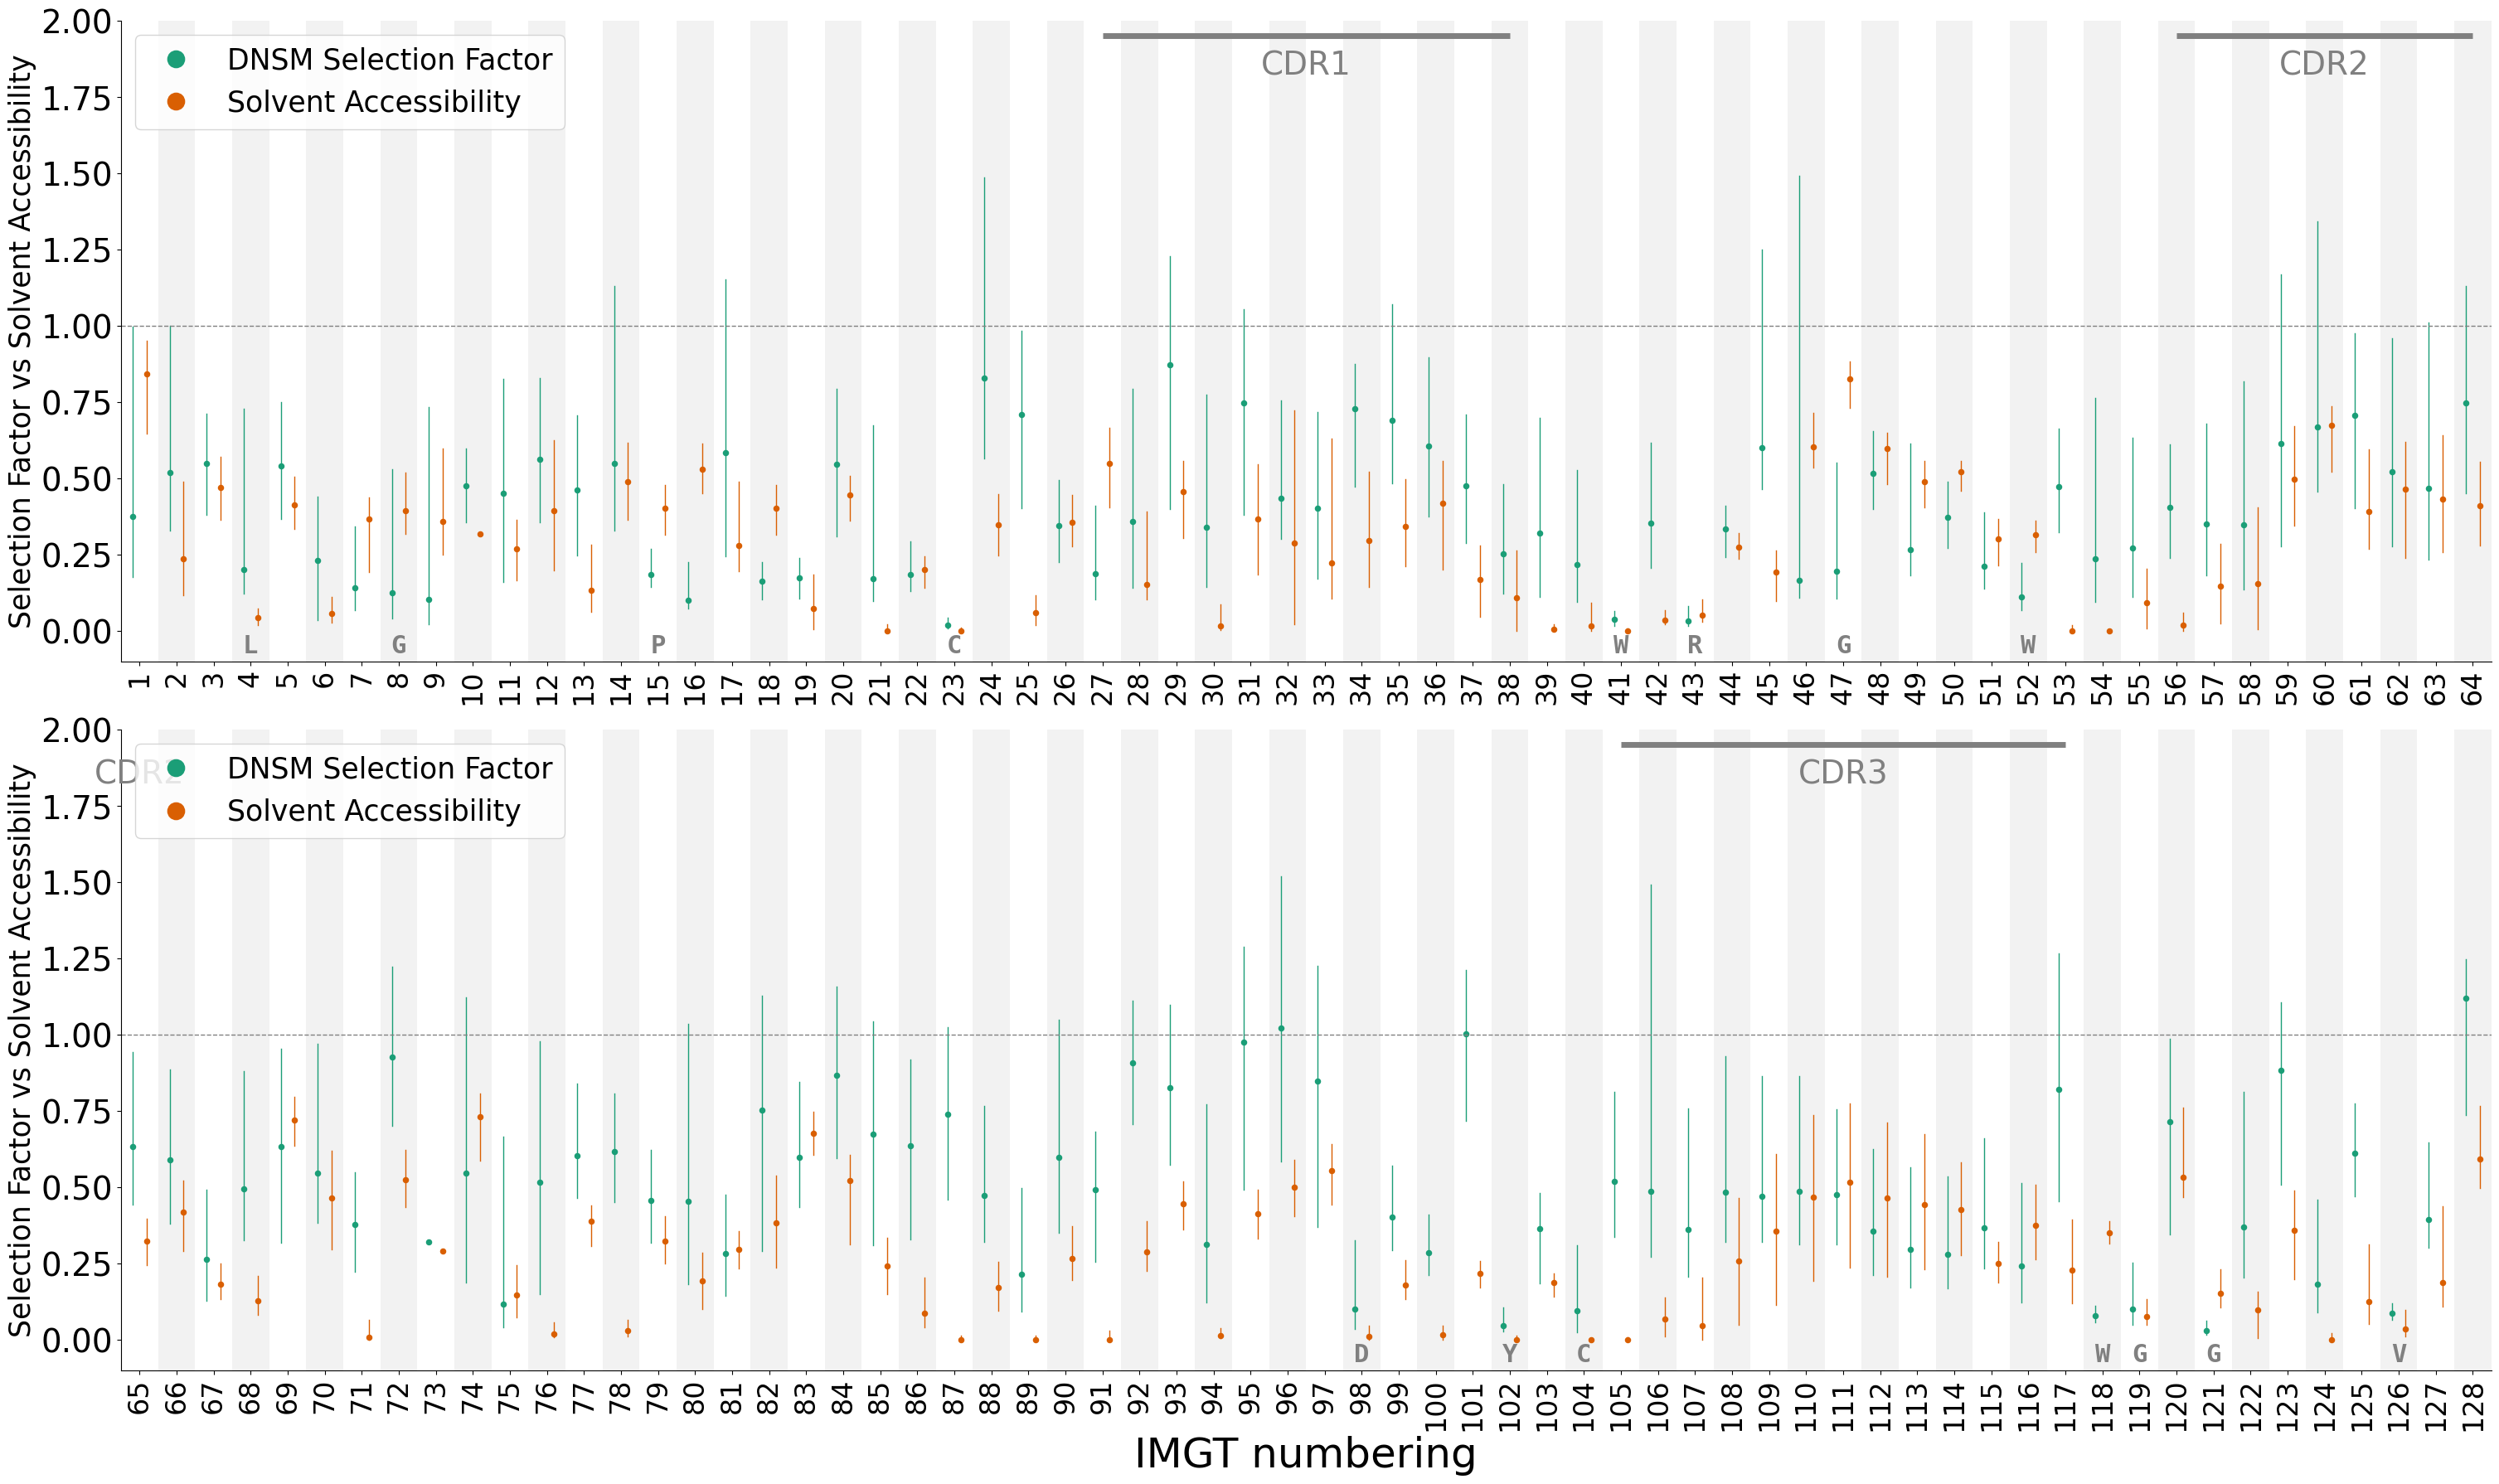

In [26]:
ax_rows, ax_cols = 2, 1
fig, axs = plt.subplots(nrows=ax_rows, ncols=ax_cols, figsize=(30 * ax_cols, 9 * ax_rows), sharey=True)

build_boxplot_via_sns2(
    axs=axs,
    name='all_abids',
    full_df=full_df,
    conserved_aas=conserved_aas,
    output_path=f'{FIGURES_OUTPUT_DIR}/all_abids.boxplot_graph.svg',
)

## Scatter Plots

In [27]:
def altair_scatter_dnsm_vs_asa(
    stat_df,
    stat_key='median',
    color_category=None,
    custom_colors=None,
    remove_ins_sites=True,
    remove_over_max_imgt=False,
    include_regression=True,
    include_master_regression=False,
    buried_sites=None,
    exposed_sites=None,
    output_path=None,
):
    df = stat_df
    # filter out sites outside range
    if remove_over_max_imgt:
        df = stat_df[stat_df['imgt_num'] <= DmsViz_Utility.MAX_NUM_SCHEME]
    # filter out insertion sites
    if remove_ins_sites:
        df = df[df.apply(lambda row: row['imgt_label'][-1] not in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ', axis=1)]

    # base data
    if color_category:
        base = alt.Chart(df).mark_circle(size=60).encode(
            x=alt.X(f'rel_asa_{stat_key}', scale=alt.Scale(domain=[-0.1, 1.2]), title=f'{stat_key} solvent accessibility'),
            y=alt.Y(f'dnsm_sf_{stat_key}', scale=alt.Scale(domain=[-0.1, 1.2]), title=f'{stat_key} selection factor'),
            color=alt.Color(color_category, scale=alt.Scale(scheme='turbo')),
            tooltip=['imgt_label', f'rel_asa_{stat_key}', f'dnsm_sf_{stat_key}',
                    f'rel_asa_quantiles', f'dnsm_sf_quantiles', 'imgt_occurrences',
                    'aa_mode', 'aa_mode_perc']
        ).properties(
            title='Selection Factor vs Solvent Accessibility',
            width=800,
            height=600
        ).interactive()
    else:
        base = alt.Chart(df).mark_circle(size=60).encode(
            x=alt.X(f'rel_asa_{stat_key}', scale=alt.Scale(domain=[-0.1, 1.2]), title=f'{stat_key} solvent accessibility'),
            y=alt.Y(f'dnsm_sf_{stat_key}', scale=alt.Scale(domain=[-0.1, 1.2]), title=f'{stat_key} selection factor'),
            color=alt.Color('imgt_num:N', scale=alt.Scale(scheme='turbo')),
            tooltip=['imgt_label', f'rel_asa_{stat_key}', f'dnsm_sf_{stat_key}',
                    f'rel_asa_quantiles', f'dnsm_sf_quantiles', 'imgt_occurrences',
                    'aa_mode', 'aa_mode_perc']
        ).properties(
            title='Selection Factor vs Relative Solvent Accessibility',
            width=800,
            height=600
        ).interactive()

    # Regression lines per group
    if color_category:
        regression = alt.Chart(df).transform_regression(
            f'rel_asa_{stat_key}',
            f'dnsm_sf_{stat_key}',
            groupby=[color_category],
            extent=[-1,2],
        ).mark_line(size=3, opacity=0.7, strokeDash=[5, 5]).encode(
            x=f'rel_asa_{stat_key}',
            y=f'dnsm_sf_{stat_key}',
            color=alt.Color(color_category, scale=alt.Scale(scheme='turbo'))
        )

    # Regression over all data
    master_regression = alt.Chart(df).transform_regression(
        f'rel_asa_{stat_key}',
        f'dnsm_sf_{stat_key}',
        extent=[-1,2],
    ).mark_line(
        color='black',
        size=3,
        opacity=0.8,
        strokeDash=[5, 5]  # optional for visual distinction
    ).encode(
        x=f'rel_asa_{stat_key}',
        y=f'dnsm_sf_{stat_key}'
    )

    # increased stroke width
    origin_lines_x = alt.Chart(pd.DataFrame({'x': [0], 'y': [0]})).mark_rule(color='black').encode(
        x=alt.datum(0),
        size=alt.value(1)  # Thickness of the x=0 line
    )
    origin_lines_y = alt.Chart(pd.DataFrame({'x': [0], 'y': [0]})).mark_rule(color='black').encode(
        y=alt.datum(0),
        size=alt.value(1)  # Thickness of the y=0 line
    )

    chart = base
    if color_category and include_regression:
        chart += regression
    if include_master_regression:
        chart += master_regression
    chart += origin_lines_x + origin_lines_y

    if output_path is not None:
        print(f"figure saved to: {output_path}")
        chart.save(output_path, format='html')
    return chart

In [28]:
def plt_scatter_dnsm_vs_asa(
    stat_df,
    stat_key='median',
    color_category=None,
    custom_colors=None,
    remove_ins_sites=True,
    remove_over_max_imgt=False,
    include_regression=True,
    include_master_regression=False,
    buried_sites=None,
    exposed_sites=None,
    x_lim=None,
    y_lim=None,
    output_path=None,
):
    # Determine colormap
    cmap = plt.cm.turbo  # Original vibrant colormap
    # Set titles and labels
    title_fontsize = 14
    label_fontsize = 24
    ticks_fontsize = 18

    df = stat_df
    # filter out sites outside range
    if remove_over_max_imgt:
        df = stat_df[stat_df['imgt_num'] <= DmsViz_Utility.MAX_NUM_SCHEME]
    # filter out insertion sites
    if remove_ins_sites:
        df = df[df.apply(lambda row: row['imgt_label'][-1] not in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ', axis=1)]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 7.5))

    # Set axis limits similar to the Altair domain settings
    window_pad = 0.1
    x_max = df[f'rel_asa_{stat_key}'].max() * (1 + window_pad)
    y_max = df[f'dnsm_sf_{stat_key}'].max() * (1 + window_pad)
    ax.set_xlim(-0.05, 1.0)
    ax.set_ylim(-0.05, 1.2)

    # ax.set_title('Selection Factor vs Solvent Accessibility', fontsize=14)
    ax.set_xlabel(f'{stat_key} relative solvent accessibility', fontsize=label_fontsize)
    ax.set_ylabel(f'{stat_key} selection factor', fontsize=label_fontsize)

    # Draw the origin lines
    ax.axhline(y=0, color='black', linewidth=1)
    ax.axvline(x=0, color='black', linewidth=1)

    # Create site classification for symbol selection
    buried_set = set(buried_sites) if buried_sites is not None else set()
    exposed_set = set(exposed_sites) if exposed_sites is not None else set()

    def get_marker_for_site(imgt_num):
        if imgt_num in buried_set:
            return "^"  # Triangle up
        elif imgt_num in exposed_set:
            return "v"  # Triangle down
        else:
            return "o"  # Circle

    def get_size_for_site(imgt_num):
        if imgt_num in buried_set or imgt_num in exposed_set:
            return 70
        else:
            return 60

    # Scatter plot with grouping if color_category is provided
    if color_category:
        # Get unique categories for coloring
        categories = df[color_category].unique()

        # Create a scatter plot for each category
        for i, category in enumerate(categories):
            subset = df[df[color_category] == category]
            color = cmap((i) / (len(categories)))
            if custom_colors:
                color = custom_colors[i % len(colors)]

            # Plot points with different markers based on site classification
            for marker_type in ["o", "^", "v"]:
                marker_subset = subset[
                    subset["imgt_num"].apply(lambda x: get_marker_for_site(x) == marker_type)
                ]
                if len(marker_subset) > 0:
                    scatter = ax.scatter(
                        marker_subset[f"rel_asa_{stat_key}"],
                        marker_subset[f"dnsm_sf_{stat_key}"],
                        s=[get_size_for_site(x) for x in marker_subset["imgt_num"]],
                        color=color,
                        marker=marker_type,
                        alpha=0.7,
                        label=f"{category}" if marker_type == "o" else "",
                    )

            # Weight x's and y's by number of occurrences
            weighted_xs, weighted_ys = [], []
            for i,row in subset.iterrows():
                weighted_xs += [row[f'rel_asa_{stat_key}']] * row.imgt_occurrences
                weighted_ys += [row[f'dnsm_sf_{stat_key}']] * row.imgt_occurrences

            # Add regression lines per category
            if include_regression:
                xs = subset[f'rel_asa_{stat_key}']
                ys = subset[f'dnsm_sf_{stat_key}']
                # for x, y in zip([xs, weighted_xs], [ys, weighted_ys]):
                for x, y in zip([weighted_xs], [weighted_ys]):
                    if len(x) > 1:  # Need at least 2 points for regression
                        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
                        r_squared = np.power(r_value, 2)
                        x_line = np.linspace(-0.1, 1.2, 100)
                        y_line = slope * x_line + intercept
                        ax.plot(x_line, y_line, color=color, linestyle='--', linewidth=2, alpha=0.7)
                        print(f"{category} | {slope=:.4e} {intercept=:.4e} {r_value=:.4e} {p_value=:.4e} {std_err=:.4e} {r_squared=:.4e}")
    else:
        # Color by imgt_num as in the original
        scatter = ax.scatter(
            df[f'rel_asa_{stat_key}'],
            df[f'dnsm_sf_{stat_key}'],
            s=60,
            c=df['imgt_num'],
            cmap=cmap,
            alpha=0.7
        )
        plt.colorbar(scatter, ax=ax, label='imgt_num')

    # Add master regression line
    if include_master_regression:
        x = df[f'rel_asa_{stat_key}']
        y = df[f'dnsm_sf_{stat_key}']
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        x_line = np.linspace(-0.1, 1.2, 100)
        y_line = slope * x_line + intercept
        ax.plot(x_line, y_line, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Overall trend')

    # Add legend
    if color_category or include_master_regression:
        ax.legend(bbox_to_anchor=(0.98, 0.98), loc='upper right', fontsize=label_fontsize)

    plt.tick_params(axis='both', labelsize=ticks_fontsize)
    ax.grid(True, linestyle='-', alpha=0.5)
    sns.despine()
    plt.tight_layout()

    if output_path is not None:
        print(f"figure saved to: {output_path}")
        plt.savefig(
            output_path,
            # bbox_inches='tight',
            # dpi=300,
        )
    return fig, ax

In [29]:
def plot_scatter_dnsm_vs_asa(
    stat_df, stat_key='median', color_category=None, custom_colors=None,
    remove_ins_sites=True, remove_over_max_imgt=False,
    include_regression=True, include_master_regression=False,
    output_path=None, plot_type='plt',
):
    if plot_type == 'altair':
        return altair_scatter_dnsm_vs_asa(
            stat_df, stat_key, color_category, custom_colors,
            remove_ins_sites, remove_over_max_imgt,
            include_regression, include_master_regression,
            output_path,
        )
    elif plot_type == 'plt':
        return plt_scatter_dnsm_vs_asa(
            stat_df, stat_key, color_category, custom_colors,
            remove_ins_sites, remove_over_max_imgt,
            include_regression, include_master_regression,
            output_path,
        )

In [30]:
# Add CDR/FWK region labels to stats
ALL_REGIONS = {"CDR1": (27, 38), "CDR2": (56, 65), "CDR3": (105, 117),
                "FR1": (0, 26), "FR2": (39, 55), "FR3": (66, 104), "FR4": (118, 128)}
CDR_REGIONS = {k: v for k, v in ALL_REGIONS.items() if k.startswith("CDR")}
FR_REGIONS = {k: v for k, v in ALL_REGIONS.items() if k.startswith("FR")}

def get_region(imgt_num):
    for name,(imgt_beg,imgt_end) in ALL_REGIONS.items():
        if (imgt_num >= imgt_beg) and (imgt_num <= imgt_end):
            return name
    print("imgt_num not found!")
    return None

stat_df['cdr_region'] = [get_region(x) for x in stat_df['imgt_num']]
display(stat_df)

,imgt,imgt_num,imgt_label,imgt_occurrences,cdr_region,is_cdr_region,aa_mode,aa_mode_count,aa_mode_perc,dnsm_sf_median,dnsm_sf_mean,dnsm_sf_quantiles,rel_asa_median,rel_asa_mean,rel_asa_quantiles
0,imgt_1,1,1,4882,FR1,False,Q,2489,0.509832,0.3758,0.5619,"(0.0589, 0.2141, 0.3758, 0.6745, 2.5059)",0.8430,0.8178,"(0.1556, 0.7644, 0.843, 0.9067, 1.0)"
1,imgt_2,2,2,6109,FR1,False,V,5577,0.912915,0.5178,0.6060,"(0.1586, 0.3773, 0.5178, 0.7714, 2.3177)",0.2356,0.2834,"(0.0, 0.1609, 0.2356, 0.3812, 1.0)"
2,imgt_3,3,3,6296,FR1,False,Q,5725,0.909307,0.5495,0.5604,"(0.0615, 0.4638, 0.5495, 0.6474, 2.3878)",0.4711,0.4670,"(0.0356, 0.4089, 0.4711, 0.5333, 1.0)"
3,imgt_4,4,4,6335,FR1,False,L,6266,0.989108,0.2006,0.3291,"(0.0423, 0.15, 0.2006, 0.4177, 1.6893)",0.0448,0.0512,"(0.0, 0.0299, 0.0448, 0.0597, 1.0)"
4,imgt_4A,4,4A,18,FR1,False,L,18,1.000000,0.7764,0.7576,"(0.607, 0.7764, 0.7764, 0.7764, 0.7764)",0.3781,0.3483,"(0.0398, 0.3657, 0.3781, 0.3818, 0.4776)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,imgt_124,124,124,6346,FR4,False,V,6092,0.959975,0.1829,0.2453,"(0.0426, 0.1141, 0.1829, 0.2997, 1.2055)",0.0000,0.0145,"(0.0, 0.0, 0.0, 0.0115, 0.6736)"
222,imgt_125,125,125,6331,FR4,False,T,5884,0.929395,0.6112,0.6181,"(0.0273, 0.5256, 0.6112, 0.7085, 1.2829)",0.1244,0.1657,"(0.0, 0.0814, 0.1244, 0.2558, 1.0)"
223,imgt_126,126,126,6271,FR4,False,V,6181,0.985648,0.0881,0.1016,"(0.0325, 0.0731, 0.0881, 0.1053, 0.9482)",0.0345,0.0559,"(0.0, 0.023, 0.0345, 0.0632, 0.8908)"
224,imgt_127,127,127,6019,FR4,False,S,5841,0.970427,0.3943,0.4435,"(0.0188, 0.3387, 0.3943, 0.4858, 2.1126)",0.1871,0.2403,"(0.0, 0.1419, 0.1871, 0.2903, 1.0)"


In [31]:
plot = plot_scatter_dnsm_vs_asa(
    stat_df,
    stat_key='median',
    plot_type='altair',
    output_path=f'{FIGURES_OUTPUT_DIR}/dnsm_asa.scatter.html',
)
plot.show()

alt.LayerChart(...)

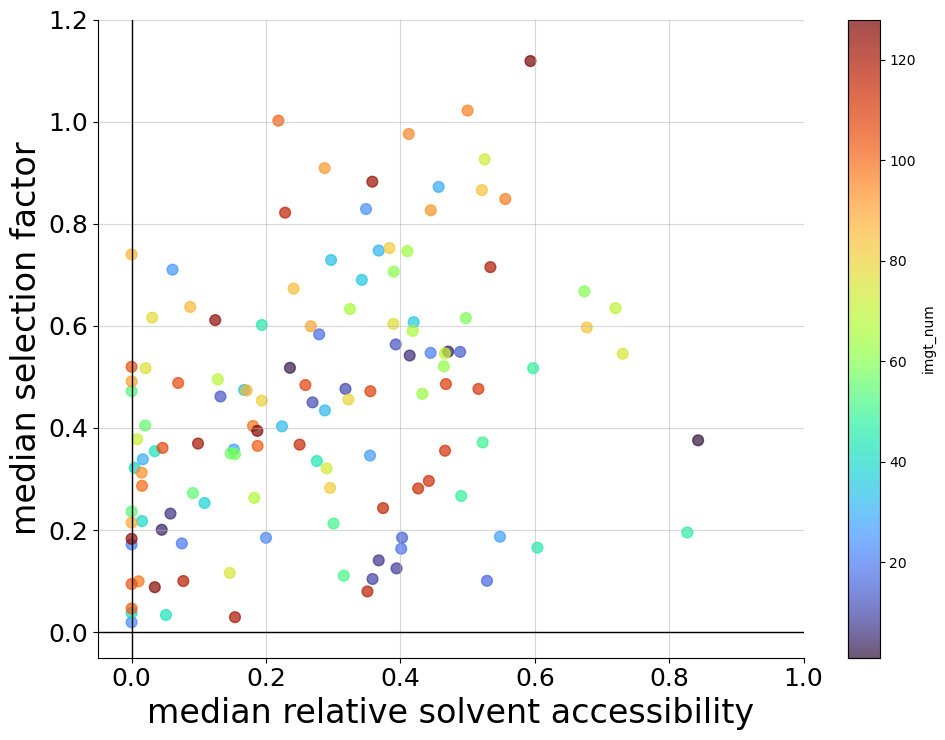

In [32]:
fig, ax = plot_scatter_dnsm_vs_asa(
    stat_df,
    stat_key='median',
    plot_type='plt',
    output_path=f'{FIGURES_OUTPUT_DIR}/dnsm_asa.scatter.svg',
)
fig.show()

In [33]:
# Compute Pearson-R scores
from scipy.stats import pearsonr
from scipy.stats import linregress
from collections import Counter

stat_df = stat_df.dropna(how='any', axis=0)
stat_key = 'median'
remove_ins_sites = False

stat_dfs = {}
stat_dfs['CDR'] = stat_df[stat_df['cdr_region'].str.startswith('CDR')]
stat_dfs['FWK'] = stat_df[stat_df['cdr_region'].str.startswith('FR')]
# display(stat_dfs['CDR'][['imgt', 'cdr_region', 'imgt_occurrences', 'aa_mode_perc', f'rel_asa_{stat_key}', f'dnsm_sf_{stat_key}']])
# display(stat_dfs['FWK'][['imgt', 'cdr_region', 'imgt_occurrences', 'aa_mode_perc', f'rel_asa_{stat_key}', f'dnsm_sf_{stat_key}']])

# filter out insertion sites
if remove_ins_sites:
    for key in stat_dfs.keys():
        df = stat_dfs[key]
        stat_dfs[key] = df[df.apply(lambda row: row['imgt_label'][-1] not in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ', axis=1)]

# unweighted imgt position evenly
for stat in ['CDR','FWK']:
    x_s = stat_dfs[stat][f'rel_asa_{stat_key}']
    y_s = stat_dfs[stat][f'dnsm_sf_{stat_key}']
    rval_pearson, pval_pearson = pearsonr(x_s, y_s)
    print(f"{stat=} {rval_pearson=}")
    slope, intercept, rval_regression, pval_regression, stderr = linregress(x_s, y_s)
    # print(f"{stat=} {slope=}, {intercept=}, {rval_regression=}, {pval_regression=}, {stderr=}")

# weight imgt position by occurrence
for stat in ['CDR','FWK']:
    x_s, y_s = [], []
    for id,row in stat_dfs[stat].iterrows():
        x_s += [row[f'rel_asa_{stat_key}']] * row.imgt_occurrences
        y_s += [row[f'dnsm_sf_{stat_key}']] * row.imgt_occurrences
    # print(Counter(x_s))
    rval_pearson, pval_pearson = pearsonr(x_s, y_s)
    print(f"{stat=} {rval_pearson=}")
    slope, intercept, rval_regression, pval_regression, stderr = linregress(x_s, y_s)
    # print(f"{stat=} {slope=}, {intercept=}, {rval_regression=}, {pval_regression=}, {stderr=}")


stat='CDR' rval_pearson=-0.08647614620149964
stat='FWK' rval_pearson=0.3545471658348687
stat='CDR' rval_pearson=0.16537771886275585
stat='FWK' rval_pearson=0.36417430373875254


CDR1 | slope=4.5689e-01 intercept=3.5124e-01 r_value=3.6526e-01 p_value=0.0000e+00 std_err=5.1073e-03 r_squared=1.3342e-01
CDR2 | slope=5.7380e-01 intercept=3.3774e-01 r_value=6.9728e-01 p_value=0.0000e+00 std_err=2.6400e-03 r_squared=4.8620e-01
CDR3 | slope=-2.6751e-01 intercept=5.1331e-01 r_value=-3.0698e-01 p_value=0.0000e+00 std_err=2.9554e-03 r_squared=9.4236e-02


(<Figure size 1000x750 with 1 Axes>,
 <Axes: xlabel='median relative solvent accessibility', ylabel='median selection factor'>)

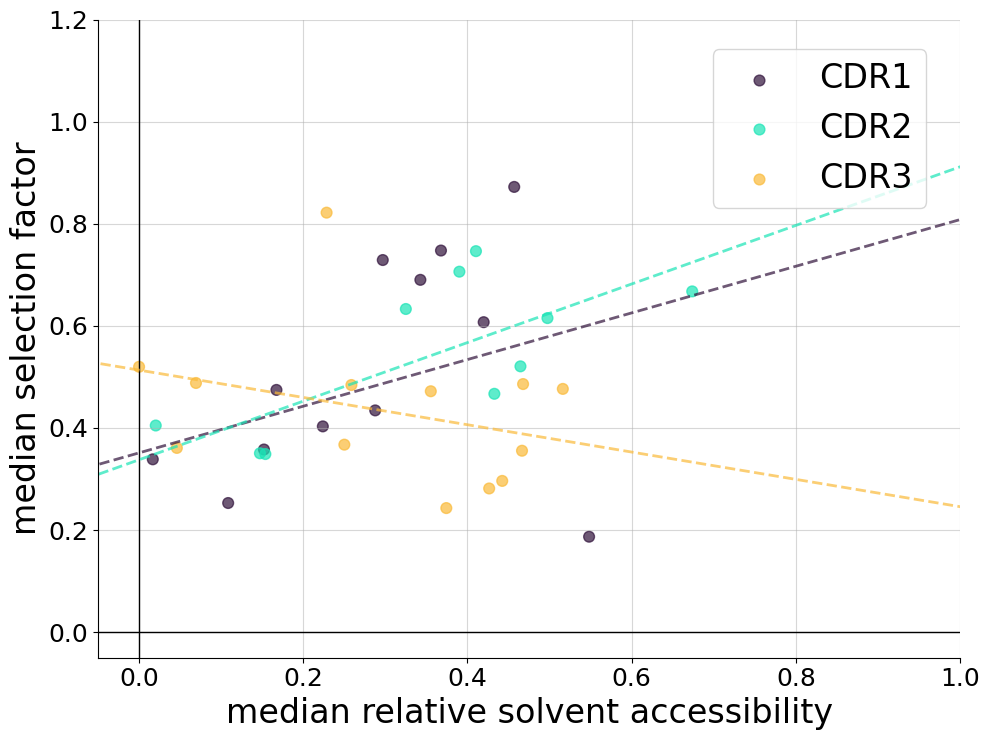

In [34]:
stat_df_cdr = stat_df[stat_df['cdr_region'].str.startswith('CDR')]
plot_scatter_dnsm_vs_asa(
    stat_df_cdr,
    color_category='cdr_region',
    # custom_colors=['#0072B2', '#E69F00'],
    remove_ins_sites=True, remove_over_max_imgt=False,
    include_regression=True, include_master_regression=False,
    # output_path=f'{FIGURES_OUTPUT_DIR}/scatter.dnsm_asa.cdr.html',
    output_path=f'{FIGURES_OUTPUT_DIR}/scatter.dnsm_asa.cdr.svg',
    plot_type='plt',
)

FR1 | slope=2.0989e-01 intercept=2.9020e-01 r_value=1.8184e-01 p_value=0.0000e+00 std_err=2.8650e-03 r_squared=3.3065e-02
FR2 | slope=4.0334e-02 intercept=2.6753e-01 r_value=6.8438e-02 p_value=1.8635e-112 std_err=1.7877e-03 r_squared=4.6837e-03
FR3 | slope=6.7483e-01 intercept=3.7035e-01 r_value=5.6521e-01 p_value=0.0000e+00 std_err=2.0040e-03 r_squared=3.1946e-01
FR4 | slope=1.3226e+00 intercept=1.1061e-01 r_value=7.2280e-01 p_value=0.0000e+00 std_err=4.8244e-03 r_squared=5.2244e-01


(<Figure size 1000x750 with 1 Axes>,
 <Axes: xlabel='median relative solvent accessibility', ylabel='median selection factor'>)

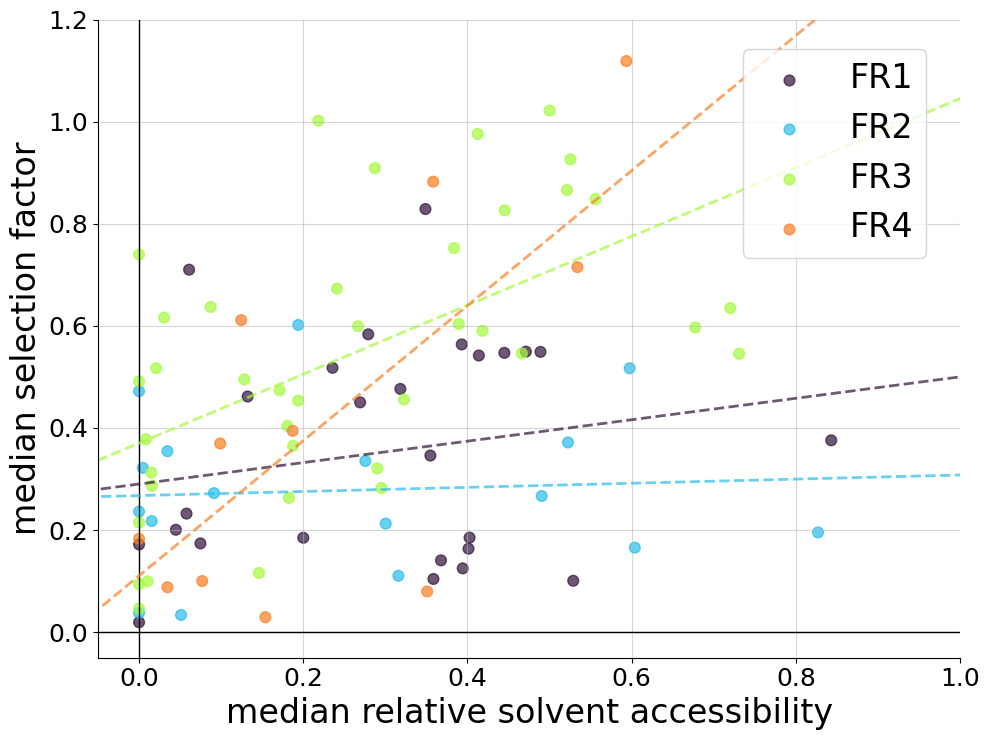

In [35]:
stat_df_fr = stat_df[stat_df['cdr_region'].str.startswith('FR')]
plot_scatter_dnsm_vs_asa(
    stat_df_fr,
    color_category='cdr_region',
    remove_ins_sites=True, remove_over_max_imgt=False,
    include_regression=True, include_master_regression=False,
    # output_path=f'{FIGURES_OUTPUT_DIR}/scatter.dnsm_asa.fwk.html',
    output_path=f'{FIGURES_OUTPUT_DIR}/scatter.dnsm_asa.fwk.svg',
    plot_type='plt',
)

FWK | slope=4.4816e-01 intercept=3.0719e-01 r_value=3.6348e-01 p_value=0.0000e+00 std_err=1.5142e-03 r_squared=1.3212e-01
CDR | slope=1.8786e-01 intercept=4.1430e-01 r_value=1.8597e-01 p_value=0.0000e+00 std_err=2.3352e-03 r_squared=3.4586e-02


(<Figure size 1000x750 with 1 Axes>,
 <Axes: xlabel='median relative solvent accessibility', ylabel='median selection factor'>)

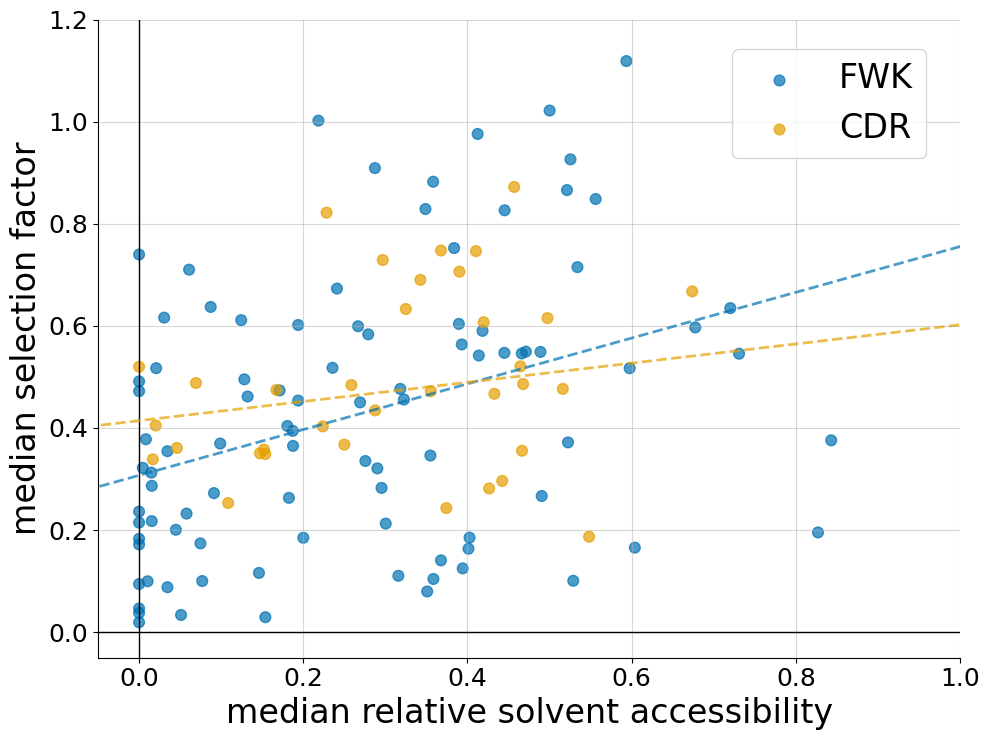

In [36]:
stat_df['region_type'] = np.where(stat_df['cdr_region'].str.startswith('CDR'), 'CDR', 'FWK')
plot_scatter_dnsm_vs_asa(
    stat_df,
    color_category='region_type',
    custom_colors=['#0072B2', '#E69F00'],
    remove_ins_sites=True, remove_over_max_imgt=False,
    include_regression=True, include_master_regression=False,
    # output_path=f'{FIGURES_OUTPUT_DIR}/scatter.dnsm_asa.cdr_fwk.html',
    output_path=f'{FIGURES_OUTPUT_DIR}/scatter.dnsm_asa.cdr_fwk.old.svg',
    plot_type='plt',
)

## Extras: Buried/Exposed Sites, Plot and Latex

In [37]:
def df_to_latex_table(df):
    """Convert dataframe to LaTeX table with specific columns and formatting."""
    # Select and rename columns.
    table_df = df[['imgt_label', 'cdr_region', 'aa_mode', 'rel_asa_median', 'dnsm_sf_median']].copy()

    column_rename_map = {
        'imgt_label': "IMGT site",
        'cdr_region': "region",
        'aa_mode': "amino acid",
        'rel_asa_median': "median relative ASA",
        'dnsm_sf_median': "median selection factor"
    }
    table_df.rename(columns=column_rename_map, inplace=True)

    # Round numeric columns to 3 significant figures and format compactly.
    numeric_columns = ["median relative ASA", "median selection factor"]
    for col in numeric_columns:
        table_df[col] = table_df[col].apply(
            lambda x: f"{round(x, 3 - int(np.floor(np.log10(abs(x)))) - 1) if x != 0 else 0:g}"
        )

    return table_df.to_latex(index=False)

In [38]:
stat_df = stat_df[stat_df['imgt_occurrences'] > 1000]
stat_df['region_type'] = np.where(stat_df['cdr_region'].str.startswith('CDR'), 'CDR', 'FWK')

exposed_conserved_df = (
    stat_df[stat_df['rel_asa_median'] > 0.3]
    .sort_values('dnsm_sf_median', ascending=True)
    .head(10)
)

buried_divergent_df = (
    stat_df[stat_df['rel_asa_median'] < 0.05]
    .sort_values('dnsm_sf_median', ascending=False)
    .head(5)
)

print(df_to_latex_table(exposed_conserved_df))
print(df_to_latex_table(buried_divergent_df))

\begin{tabular}{lllll}
\toprule
IMGT site & region & amino acid & median relative ASA & median selection factor \\
\midrule
118 & FR4 & W & 0.351 & 0.0798 \\
16 & FR1 & G & 0.529 & 0.101 \\
9 & FR1 & G & 0.358 & 0.104 \\
52 & FR2 & W & 0.316 & 0.111 \\
8 & FR1 & G & 0.394 & 0.125 \\
7 & FR1 & S & 0.368 & 0.141 \\
18 & FR1 & S & 0.401 & 0.164 \\
46 & FR2 & P & 0.604 & 0.166 \\
15 & FR1 & P & 0.403 & 0.185 \\
27 & CDR1 & G & 0.548 & 0.187 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllll}
\toprule
IMGT site & region & amino acid & median relative ASA & median selection factor \\
\midrule
87 & FR3 & A & 0 & 0.74 \\
78 & FR3 & I & 0.0305 & 0.616 \\
105 & CDR3 & A & 0 & 0.52 \\
76 & FR3 & F & 0.0208 & 0.517 \\
91 & FR3 & M & 0 & 0.491 \\
\bottomrule
\end{tabular}



FWK | slope=4.4816e-01 intercept=3.0719e-01 r_value=3.6348e-01 p_value=0.0000e+00 std_err=1.5142e-03 r_squared=1.3212e-01
CDR | slope=1.8059e-01 intercept=4.1408e-01 r_value=1.7986e-01 p_value=0.0000e+00 std_err=2.3360e-03 r_squared=3.2349e-02
figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_asa/scatter.dnsm_asa.cdr_fwk.svg


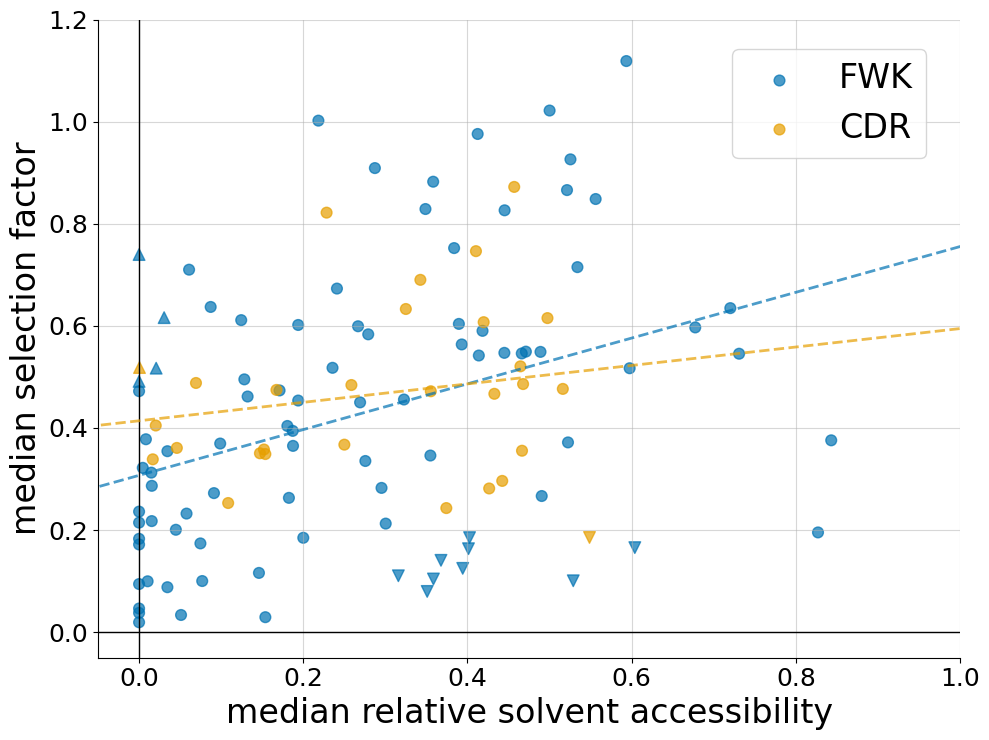

In [39]:
buried_sites = buried_divergent_df['imgt_num'].tolist()
exposed_sites = exposed_conserved_df['imgt_num'].tolist()

fig, ax = plt_scatter_dnsm_vs_asa(
    stat_df,
    color_category='region_type',
    custom_colors=['#0072B2', '#E69F00'],
    remove_ins_sites=True, remove_over_max_imgt=False,
    include_regression=True, include_master_regression=False,
    buried_sites=buried_sites,
    exposed_sites=exposed_sites,
    output_path=f'{FIGURES_OUTPUT_DIR}/scatter.dnsm_asa.cdr_fwk.svg',
)
fig.show()

In [40]:
buried_sites[:3], exposed_sites[:3]

([87, 78, 105], [118, 16, 9])